<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-DL/blob/main/Data_Augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import cv2
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
with zipfile.ZipFile("/content/train_data.zip", "r") as f:
    f.extractall("extracted_images")

In [ ]:
image_folder = "extracted_images/train_data"
subfolders = os.listdir(image_folder)
print(subfolders)

['pebbel', 'Rope', 'Tool box', 'Pliers', 'Hammer']


In [ ]:
image_data = []

for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    images = os.listdir(subfolder_path)

    for image_name in images:
        image_path = os.path.join(subfolder_path, image_name)
        image = Image.open(image_path)
        image_data.append(image)
    # break #just reading 1st folder which is of Wrench

In [ ]:
len(image_data)

3093

### Displaying original images

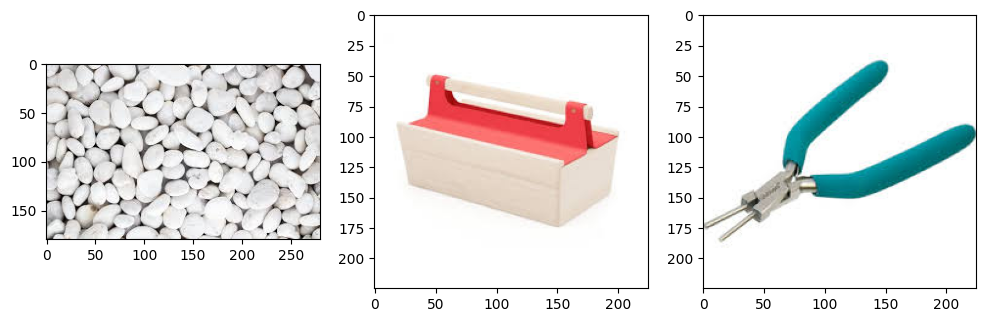

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.imshow(image_data[0])

plt.subplot(1,3,2)
plt.imshow(image_data[1330])

plt.subplot(1,3,3)
plt.imshow(image_data[1743])

In [ ]:
img_width, img_height = 224, 224
num_augmentations = 5 #Change it according to the test, I have limited it to 3 to save some minute time.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#Change the parameters according to the need/test

This piece of code can be used for augumenting all the images

In [ ]:
%%time
for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    images = os.listdir(subfolder_path)

    for image_name in images:
        image_path = os.path.join(subfolder_path, image_name)
        img = Image.open(image_path)
        img = img.convert('RGB')

        img = img.resize((img_width, img_height))

        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        aug_count = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir='extracted_images/preview', save_prefix='aug', save_format='jpg'):
            aug_count += 1
            if aug_count >= num_augmentations:
                break

CPU times: user 4min 2s, sys: 4.08 s, total: 4min 6s
Wall time: 4min 15s


Displaying few images comparision with Original and Auguemented.


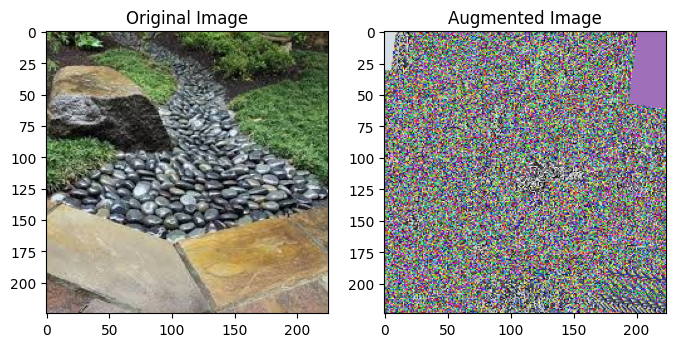

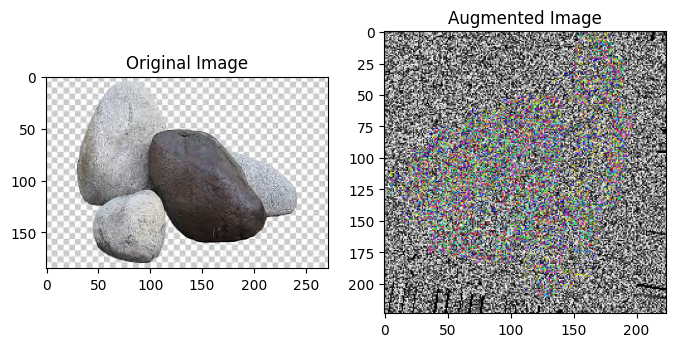

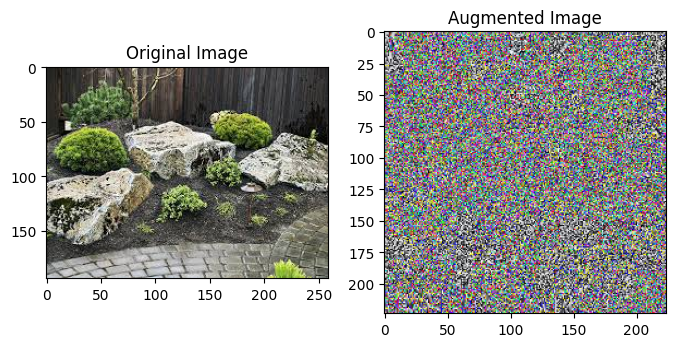

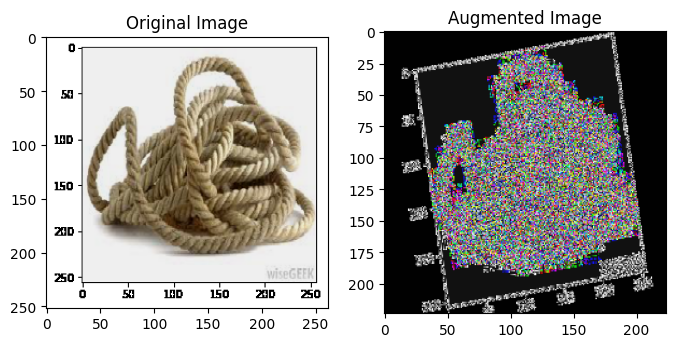

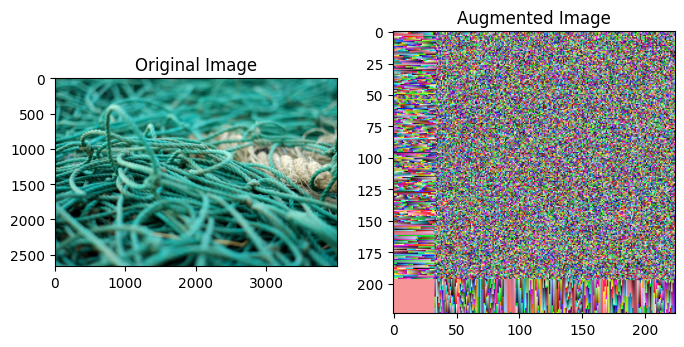

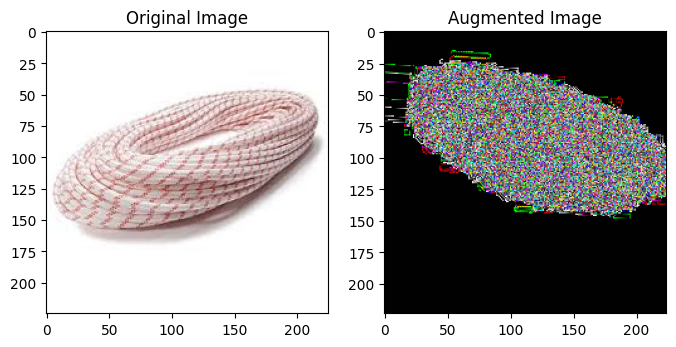

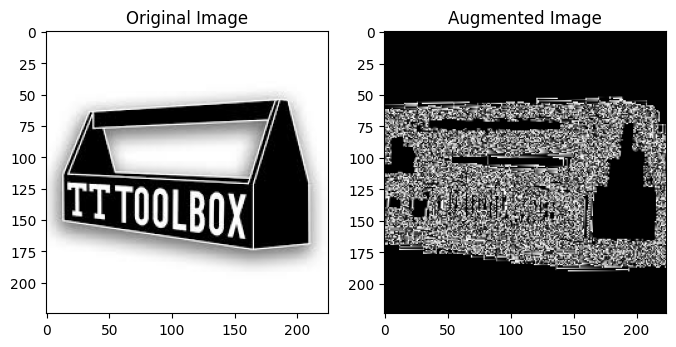

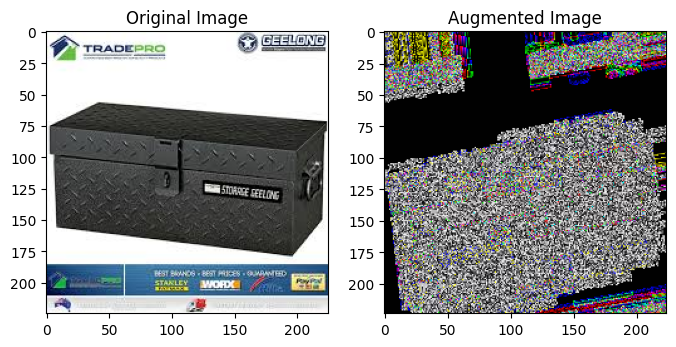

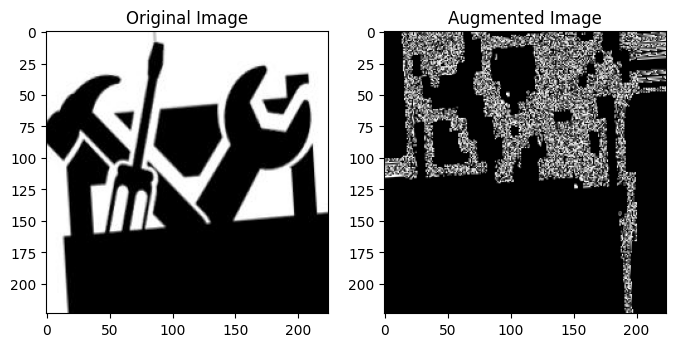

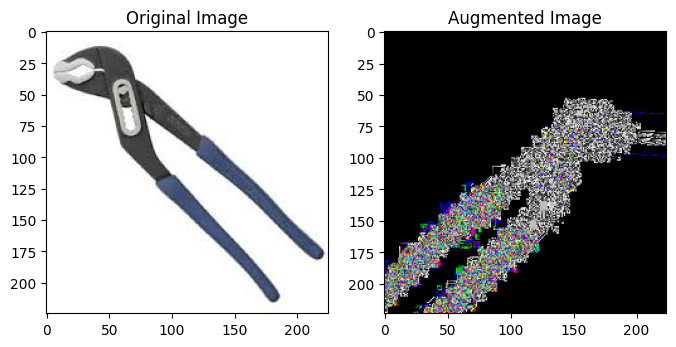

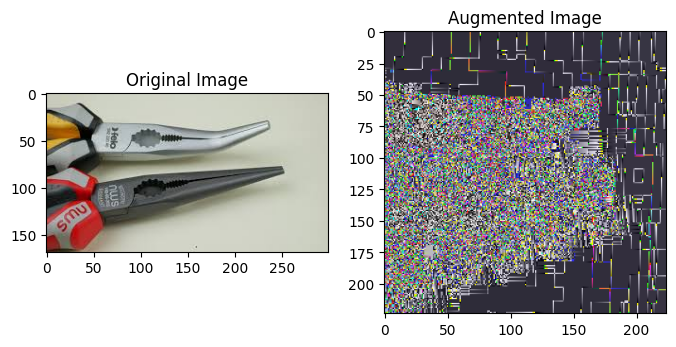

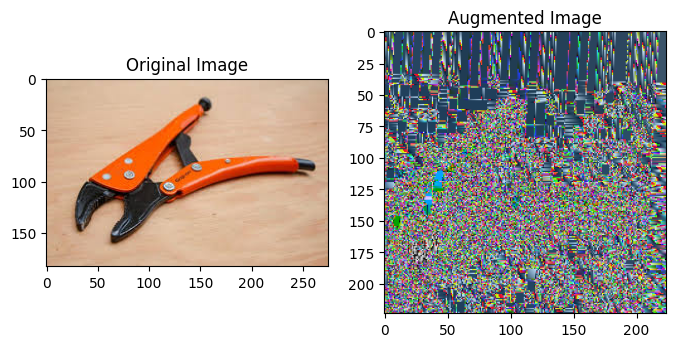

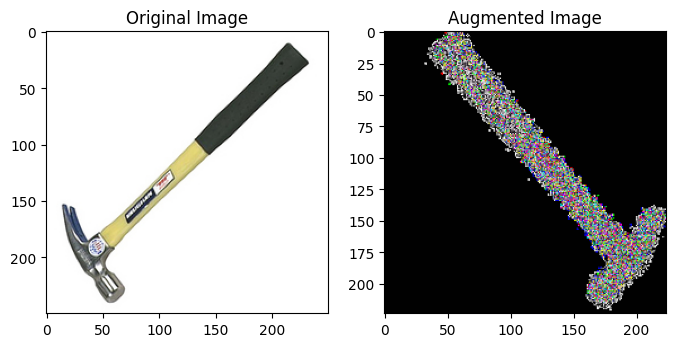

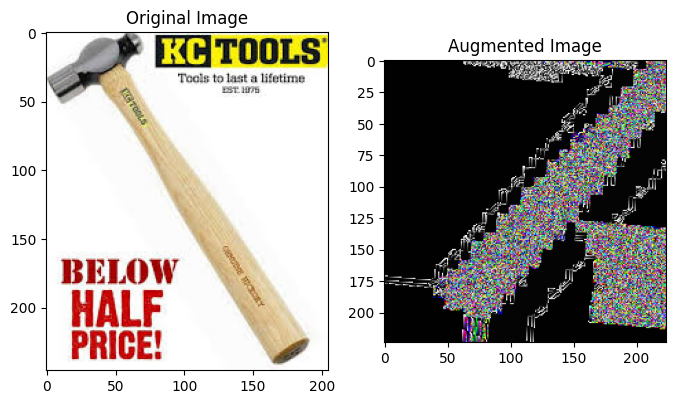

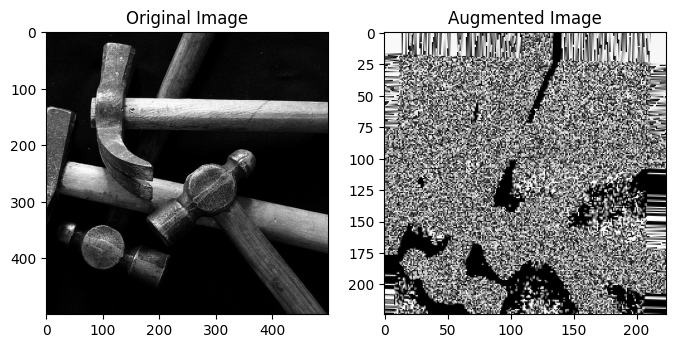

In [ ]:
for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    images = os.listdir(subfolder_path)

    sample_images = np.random.choice(images, size=3)

    for image_name in sample_images:
        image_path = os.path.join(subfolder_path, image_name)
        img = Image.open(image_path)
        img = img.convert('RGB')

        # Displaying the original image
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(img)

        plt.title('Original Image')

        # Augmented image
        img = img.resize((img_width, img_height))

        img_array = np.array(img)
        img_array = img_array.reshape((1,) + img_array.shape)
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir='extracted_images/preview', save_prefix='aug', save_format='jpg'):
            aug_img = batch[0]
            plt.subplot(1, 2, 2)

            plt.imshow((aug_img * 255).astype(np.uint8))

            plt.title('Augmented Image')

            i += 1
            if i >= num_augmentations:
                break

        plt.show()

